# **Questão 1 (2 pontos)**


---



Colete 5 bases de dados diferentes da internet e utilize a biblioteca pymfe para extrair as metafeatures de cada uma, depois calcule a distância euclidiana de cada base e mostre quais são as mais próximas.



Dica: utilize sites como o openML e o kaggle para obter as bases de dados e olhe a documentação da biblioteca em https://pypi.org/project/pymfe/

In [26]:
!pip install pymfe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 4.8 MB/s 


In [32]:
from dataclasses import dataclass
from sklearn.datasets import load_iris, load_diabetes, load_digits, load_wine, load_breast_cancer
from pymfe.mfe import MFE
from pymfe.clustering import MFEClustering
from pymfe.landmarking import MFELandmarking
from pymfe.statistical import MFEStatistical
import numpy as np

datasetsname = ["load_iris", "load_diabetes", "load_digits", "load_wine", "load_breast_cancer"]
datasets = [load_iris(), load_diabetes(), load_digits(), load_wine(), load_breast_cancer()]

def Extract(data):
  y = data.target
  X = data.data

  mfe = MFE()
  mfe.fit(X, y)
  ft = mfe.extract()
  return ft[1]

def Distance(features1, features2):

  features1 = np.array(features1)

  for x in range(len(np.isnan(features1))):
    if(np.isnan(features1)[x] == True):
      features1[x] = 0
      features2[x] = 0

  features2 = np.array(features2)

  for x in range(len(np.isnan(features2))):
    if(np.isnan(features2)[x] == True):
      features2[x] = 0
      features1[x] = 0

  dist = np.linalg.norm(features1 - features2)

  return dist

result = []

for w in range(len(datasets)):
  for k in range(w, len(datasets)):
    if(w != k):
      result.append(datasetsname[w] + " | " + datasetsname[k] + " distance: " + str(Distance(Extract(datasets[w]), Extract(datasets[k]))))


for x in result:
  print(x)

/usr/local/lib/python3.7/dist-packages/pymfe/_internal.py:615: RuntimeWarning: Can't extract feature 'mad'.
 Exception message: AttributeError("module 'scipy.stats' has no attribute 'median_abs_deviation'").
 Will set it as 'np.nan' for all summary functions.
  RuntimeWarning,
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/pymfe/_internal.py:734: RuntimeWarning: Can't summarize feature 'mad' with summary 'mean'. Will set it as 'np.nan'.
  RuntimeWarning,
/usr/local/lib/python3.7/dist-packages/pymfe/_internal.py:734: RuntimeWarning: Can't summarize feature 'mad' with summary 'sd'. Will set it as 'np.nan'.
  RuntimeWarning,
/usr/local/lib/python3.7/dist-packages/pymfe/_internal.py:1566: UserWarning: It is no

load_iris | load_diabetes distance: 311296755.11040944
load_iris | load_digits distance: 69868.23422796199
load_iris | load_wine distance: 40377.06661371736
load_iris | load_breast_cancer distance: 104979.37601507654
load_diabetes | load_digits distance: 301687132.05291545
load_diabetes | load_wine distance: 156556931.26397136
load_diabetes | load_breast_cancer distance: 94561197.0120432
load_digits | load_wine distance: 80669.87709874111
load_digits | load_breast_cancer distance: 125718.31853027844
load_wine | load_breast_cancer distance: 65474.03236316013


# **Questão 2 (0,5 ponto)**



---


Qual a importância de usar as metafeatures para obter informações das bases de dados durante o processo de recomendação de algoritmos?

No processo de recomendação de algoritmos as metafeatures apresentam um papel incrivelmente importante, visto que elas desempenham um papel crucial na construção dos chmados meta-dados. Podemos dizer que o objetivo das metafeatures é ajudar a selecionar os principais atributos de um conjunto de dados visando melhorar o desempenho dos algoritmos de aprendizagem de máquina utilizados.

# **Questão 3 (0,5 ponto)**



---



Explique como o SVM utiliza o kernel Tric.

O processo de treinamento de um classificador SVM, é feito através de operações com os vetores de maior dimensão presentes no espaço de carcterísticas transformado. Mas quando estamos trbalhando com aplicações reais podem existir muitos recursos nos dados de modo que, as transformações passam a envolver muitas combinações polinomias fazendo com que a resolução do problema se torne impraticável.
Podemos então usar o "truque do kernel" para solucionar o problema. Esse truque consiste no fato que os métodos do kernel apenas representam os dados através de um conjunto de comparações de semelhanças de pares entre as observações dos dados originais, ao invés de aplicar as transformações ϕ(x) de forma explícita representando os dados por essas coordenadas que foram transformadas no espaço de recursos que possui uma dimnesão superior.

# **Questão 4 (0,5 ponto)**


---



Como os hiperparâmetros C, Gamma e Kernel influenciam no funcionamento e interpretação do SVM ?

O hiperparâmetro Gamma é utilizado com o kernel Gaussian RBF, quando usamos o kernel linear ou o polimomial, não é necessário usar o Gamma, (precisamos apenas do hiperparâmetro C). Assim, o hiperparâmtero Gamma decide a quantidade de curvatura em um limite de decisão (quanto maior o Gamma mais curvatura teremos).
Já o hiperparâmetro C determina é responsável por definir o equilíbrio entre permitir a presença de erros de treinamento e forçar margens rígidas entre a separação das classes. Criando uma margem que permite alguns erros de classificação.

# **Questão 5 (1,5 ponto)**


---



Escolha uma base de dados de classificação de sua preferência e e utilize os métodos Grind Search e Random Search para encontrar os melhores hiperparametros do SVM para a base de dados.

# GRIND SEARCH

In [ ]:
import pandas as pd 
import numpy as np 
from sklearn.datasets import load_breast_cancer 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix 


c = load_breast_cancer()

df_feat = pd.DataFrame(c['data'], columns = c['feature_names'])

df_target = pd.DataFrame(c['target'], columns =['Cancer'])

print("Caracteristicas: ") 
print(df_feat.info())

Caracteristicas: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothne

In [ ]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
                        df_feat, np.ravel(df_target),
                test_size = 0.30, random_state = 101)

model = SVC()

model.fit(X_train, y_train)
 
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.85      0.90        66
           1       0.91      0.97      0.94       105

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

grid.fit(X_train, y_train)

print("#######################################################################################")

print("Antes do Grid Search: " + str(grid.best_params_))
print("Melhor score: " + str(grid.best_score_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.637 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [ ]:
grid_predictions = grid.predict(X_test)
 
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        66
           1       0.94      0.96      0.95       105

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



# RANDOM SEARCH

In [ ]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

randomSearch = RandomizedSearchCV(SVC(),param_grid, cv = 5)
  
randomSearch.fit(X_train, y_train)



RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']})

In [ ]:
print("Antes do Random Search: " + str(randomSearch.best_params_))
print("Melhor score: " + str(randomSearch.best_score_))

Antes do Random Search: {'kernel': 'rbf', 'gamma': 0.0001, 'C': 10}
Melhor score: 0.9472468354430379


In [ ]:
randomSearch = randomSearch.predict(X_test)

print(classification_report(y_test, randomSearch))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        66
           1       0.94      0.97      0.96       105

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



# **Questão 6 (1 ponto)**


---

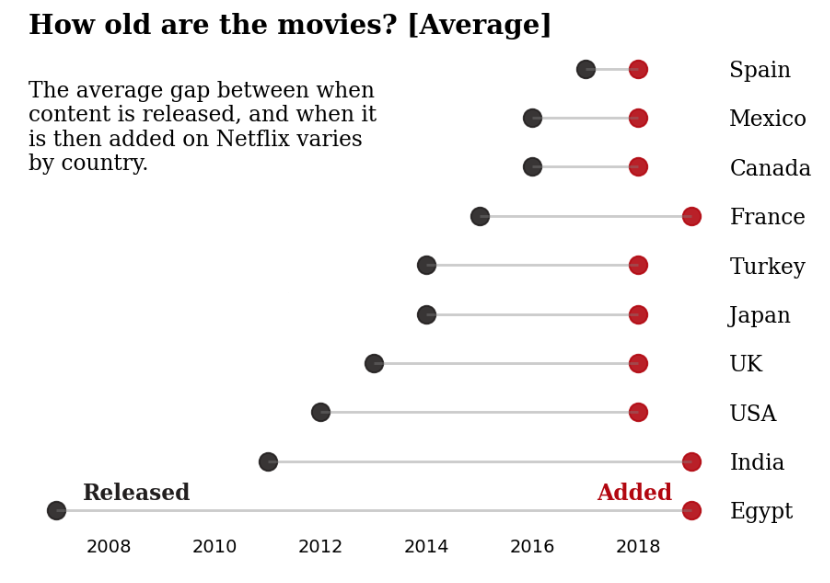


Tendo como base a imagem acima, essa é uma boa representação desse tipo de dado? Descreva como essa forma de visualização de dados pode ser comparada com um gráfico semelhante de barras.

(Obs: Os valores utilizados das coordenadas são do valor médio de ano de lançamento e ano de adição à Netflix.)

---

**Base de dados e gráficos utilizados:** [Netflix Data Visualization](https://www.kaggle.com/code/joshuaswords/netflix-data-visualization/notebook)


Não é uma boa representação visto que as informações ficam confusas e apresentam baixa clareza para quem vai analisar o gráfico. E sim, esse gráfico pode ser comparado a um gráfico de barras convencional visto que suas barras são dispostas de forma semelhante ao normal, e utiliza uma noção de espaço retilínea.

# **Questão 7 (0,5 ponto)**


---

A partir da questão anterior, quais conclusões podemos tirar a partir de uma análise desse gráfico?

# **Questão 8 (1,5 ponto)**


---



Elabore um Diagrama de Pareto com a base `videogame_sales.csv`.

Utilize 2 colunas desejadas entre `Developer`, `Rating`, `Publisher` e `Genre` com os valores desejados e faça uma avaliação a partir do seu diagrama gerado.

Por exemplo, avalie a coluna `Developer` a partir do `Rating == E`.

**Obs: recomendado utilizar só uma pequena porção dos dados. Como no exemplo acima, utilizar somente os 10 `Developers` mais frequentes na base com `Rating == E` ao invés de todos.**

**Para mais informações sobre como esse diagrama funciona, aqui vão alguns lins:**

* [Diagrama de Pareto](https://ferramentasdaqualidade.org/diagrama-de-pareto/)
* [Gestão de processos - O que é um Diagrama de Pareto? [Com exemplos]](https://blog.zeev.it/diagrama-de-pareto/)
* [Diagrama de Pareto - Wikipédia](https://pt.wikipedia.org/wiki/Diagrama_de_Pareto)

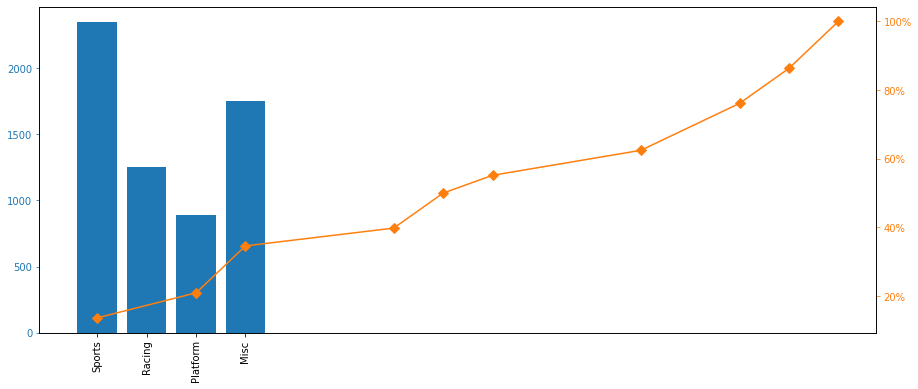

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter

df = pd.read_csv("https://raw.githubusercontent.com/zadhart/Lista-3-Data-Science/master/videogame_sales.csv")

df['Freq'] = df.groupby('Genre')['Genre'].transform('count') 

df = df[df['Rating']=='E'] 

df["cumpercentage"] = df["Freq"][:10].cumsum()/df["Freq"][:10].sum()*100 

fig, ax = plt.subplots(figsize=(15,6))

ax.bar(df['Genre'][:10], df["Freq"][:10], color="C0")

plt.xticks(rotation=90)

ax2 = ax.twinx()

ax2.plot(df.index, df["cumpercentage"], color="C1", marker="D", ms=7)

ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")

ax2.tick_params(axis="y", colors="C1")

plt.show()


195.0


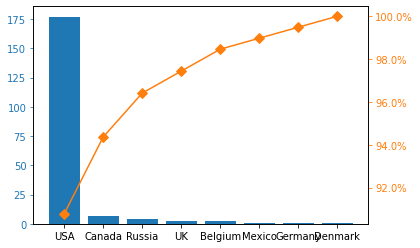

In [20]:
df = pd.DataFrame({'country': [177.0, 7.0, 4.0, 2.0, 2.0, 1.0, 1.0, 1.0]})

df.index = ['USA', 'Canada', 'Russia', 'UK', 'Belgium', 'Mexico', 'Germany', 'Denmark']

print(df["country"].sum())

df = df.sort_values(by='country',ascending=False)

df["cumpercentage"] = df["country"].cumsum()/df["country"].sum()*100

fig, ax = plt.subplots()

ax.bar(df.index, df["country"], color="C0")

ax2 = ax.twinx()

ax2.plot(df.index, df["cumpercentage"], color="C1", marker="D", ms=7)

ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")

ax2.tick_params(axis="y", colors="C1")

plt.show()

# **Questão 9 (2 pontos)**


---


Usando a base de dados `sales_ts.csv`, quais conclusões podem ter tiradas de uma avaliação desses dados? Qual a sua tendência e sazonalidade?

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mt

df = pd.read_csv("https://raw.githubusercontent.com/zadhart/Lista-3-Data-Science/master/sales_ts.csv")

df = df.dropna()

df['Period'] = df['Period'].astype(str)

df['Period']= df['Period'].str.replace('.','-')

df.set_index('Period', inplace=True) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # Remove the CWD from sys.path while we load stuff.


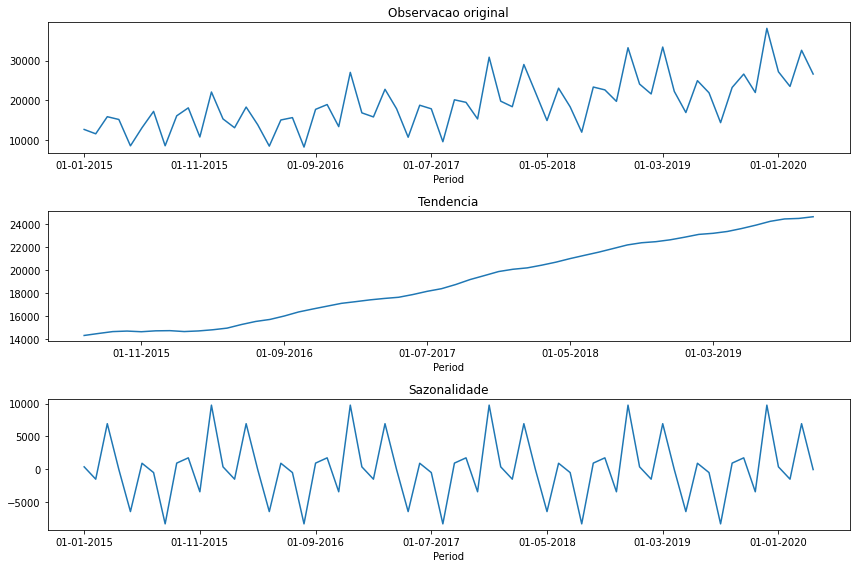

In [23]:
result = seasonal_decompose(df['Sales_quantity'],freq=12)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(12,8))

result.observed.plot(ax=ax1,title='Observacao original')

result.trend.plot(ax=ax2, title='Tendencia')

result.seasonal.plot(ax=ax3, title='Sazonalidade')
plt.tight_layout()

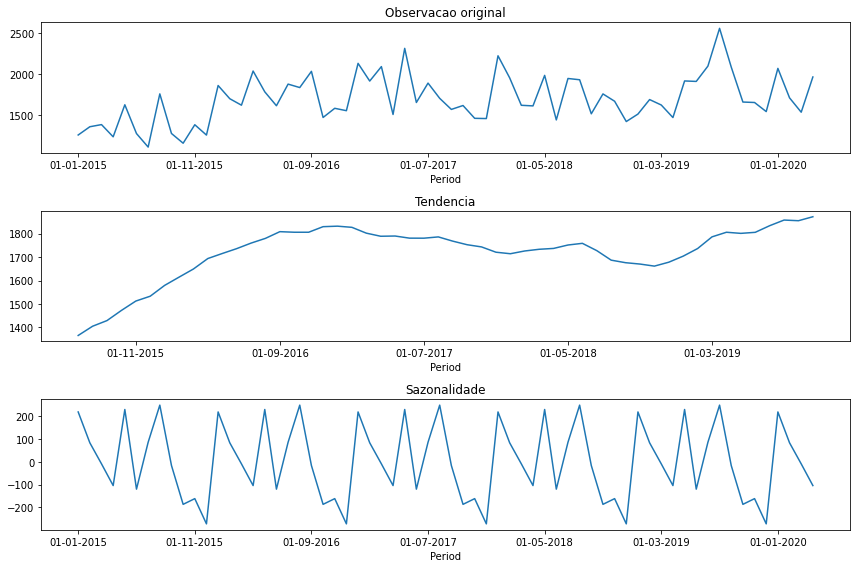

In [24]:
result = seasonal_decompose(df['Average_cost'],freq=12)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(12,8))

result.observed.plot(ax=ax1, title='Observacao original')

result.trend.plot(ax=ax2, title='Tendencia')

result.seasonal.plot(ax=ax3, title='Sazonalidade')
plt.tight_layout()

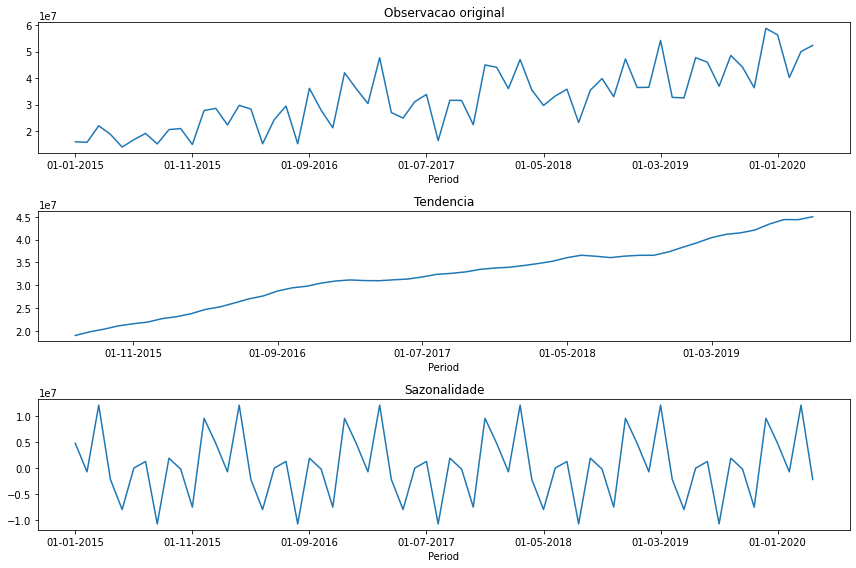

In [25]:
result = seasonal_decompose(df['Revenue'],freq=12)

fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(12,8))

result.observed.plot(ax=ax1, title='Observacao original')

result.trend.plot(ax=ax2, title='Tendencia')

result.seasonal.plot(ax=ax3, title='Sazonalidade')

plt.tight_layout()

Analisando os gráficos gerados podemos afirmar que existe uma tendência de crescimento, e que também temos picos sazonais no meio e final do ano. Que provavelmente estão relacionados a períodos festivos ou promoções.